In [1]:
# project: p5
# submitter: ratushko
# partner: none
# hours: 17

In [2]:
import requests
import pandas as pd
from zipfile import ZipFile
import edgar_utils
from io import TextIOWrapper
from graphviz import Graph, Digraph
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import re

In [3]:
with ZipFile('server_log.zip') as zf:
    with zf.open("rows.csv") as f:
         df = pd.read_csv(f)

In [4]:
#Q1
total_size = df["size"].sum()
int(total_size)

24801002666

In [5]:
#Q2
unique_ips = df["ip"].value_counts()
filings_top_10 = unique_ips.to_dict()
filings_list = list(filings_top_10.items())[:10]
dict(filings_list)

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [6]:
#Q3
total_requests = 0
error_count = 0

for val in df["code"]:
    total_requests += 1
    if val >= 400:
        error_count += 1
        
percent_error = error_count/total_requests
percent_error

0.03466852724527611

In [7]:
#Q4
file_name = df["cik"].astype(int).astype(str) + "/" + df["accession"] + "/" + df["extention"]
df["file"] = file_name

times_accessed = df["file"].value_counts()
times_accessed.index[0]

/home/zhenyaratushko/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


'1627631/0001627631-15-000004/.txt'

In [8]:
#Q5
crawler_count = df["crawler"].value_counts()
crawler_count[1.0]

971

In [9]:
#Q6
region_dict = {}

for val in df["ip"]:
    region = edgar_utils.lookup_region(val)
    if region not in region_dict:
        region_dict[region] = 1
    else:
        region_dict[region] += 1
        
sorted_region = sorted(region_dict.items(), key=lambda x:x[1], reverse=True)[0][0]
sorted_region

'United States of America'

In [10]:
#Q7
master_dict = {}
for val in df["ip"]:
    if val not in master_dict:
        master_dict[val] = 0
    master_dict[val] += 1

high_usage_dict = {}
total_dict = {}
for val in master_dict:
    region = edgar_utils.lookup_region(val)
    if region not in total_dict:
        total_dict[region] = 0
    total_dict[region] += 1
    if master_dict[val] >= 1000:
        if region not in high_usage_dict:
            high_usage_dict[region] = 0
        high_usage_dict[region] += 1

final_dict = {}
for region in total_dict:
    if region in high_usage_dict:
        final_dict[region] = high_usage_dict[region]/total_dict[region]
    else:
        final_dict[region] = 0
        
final_dict

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'Hong Kong': 0,
 'Ireland': 0.3125,
 'Canada': 0.017857142857142856,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Czechia': 0,
 'Germany': 0,
 'Bulgaria': 0.3333333333333333,
 'France': 0.0036900369003690036,
 'India': 0.058823529411764705,
 'Korea (Republic of)': 0.2,
 'Australia': 0.07692307692307693,
 'Spain': 0,
 'Netherlands': 0,
 'Sweden': 0,
 'Sudan': 0,
 'Estonia': 0,
 'Russian Federation': 0,
 'Tanzania, United Republic of': 0,
 'Yemen': 0,
 'Algeria': 0,
 'Ukraine': 0,
 'Slovakia': 0,
 'Viet Nam': 0,
 'Denmark': 0,
 'Singapore': 0,
 'Switzerland': 0,
 'Thailand': 0,
 'South Africa': 0,
 'Italy': 0,
 'Poland': 0,
 'Taiwan (Province of China)': 0,
 'Brazil': 0,
 'Morocco': 0,
 'Malaysia': 0,
 'Hungary': 0,
 'Japan': 0,
 'Luxembourg': 0,
 'Romania': 0,
 'Liberia': 0,
 'Israel': 0,
 'Bangladesh': 0,
 'Austria': 0,
 'Indonesia': 0,
 'Saudi Arabia': 0,
 'Armenia': 

In [11]:
z = ZipFile("docs.zip")
files = z.infolist()
file_list = []

for val in range(len(files)):
    if files[val].filename.endswith(".htm") == True or files[val].filename.endswith(".html"):
        file_list.append(files[val].filename)
        
files_dict = {}

for file in file_list:
    with ZipFile("docs.zip") as zf:
        with zf.open(file, "r") as f:
            text = TextIOWrapper(f)
            data = text.read()
    files_dict[file] = edgar_utils.Filing(data)

In [12]:
#Q8
files_dict["850693/0000850693-07-000159/-index.htm"].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [13]:
#Q9
state_dict = {}
for file in files_dict:
    state = files_dict[file].state()
    if state != None:
        if state not in state_dict:
            state_dict[state] = 1
        else:
            state_dict[state] += 1
        
state_dict

{'CA': 92,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CO': 25,
 'NY': 83,
 'TX': 67,
 'FL': 21,
 'AL': 1,
 'IN': 5,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 9,
 'IL': 25,
 'GA': 9,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [14]:
#Q10
sic_dict = {}
for file in files_dict:
    sic = files_dict[file].sic
    if sic != None:
        if sic not in sic_dict:
            sic_dict[sic] = 1
        else:
            sic_dict[sic] += 1
        
sic_dict

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [15]:
#Q11
master_sic_dict = {}

for row in df["file"]:
    if row in files_dict and files_dict[row].sic != None:
        if row in files_dict.keys():
            if files_dict[row].sic not in master_sic_dict:
                master_sic_dict[files_dict[row].sic] = 1
            else:
                master_sic_dict[files_dict[row].sic] += 1 
        
sorted_master_sic_dict = sorted(master_sic_dict.items(), key=lambda x:x[1], reverse=True)
dict(sorted_master_sic_dict)

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [16]:
#Q12
requests_dict = {}

for val in df["time"]:
    times = pd.to_datetime(val)
    hour = times.hour
    if hour not in requests_dict:
        requests_dict[hour] = 1
    else:
        requests_dict[hour] += 1

requests_dict

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

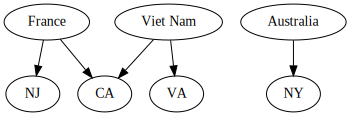

In [17]:
#Q13
g = Digraph(strict=True)
country_state_dict = {}

for entry in range(len(df)):
    if df.loc[entry, "file"] in files_dict:
        if files_dict[df.loc[entry, "file"]].state() != None:
            country = edgar_utils.lookup_region(df.loc[entry, "ip"])
            if country == "Australia" or country == "France" or country == "Viet Nam":
                if country in country_state_dict:
                    country_state_dict[country].append(files_dict[df.loc[entry, "file"]].state())
                else:
                    country_state_dict[country] = [files_dict[df.loc[entry, "file"]].state()]
                                                       
for val in country_state_dict:
    for state in country_state_dict[val]:
        g.node(state)
        g.edge(val, state)
                                                       
g

In [18]:
#Q14
addresses_dict = {}
final_addresses_dict = {}

for file in df["file"]:
    if file in files_dict:
        address_object = files_dict[file].addresses
        for address in address_object:
            if address not in addresses_dict:
                addresses_dict[address] = 1
            else:
                addresses_dict[address] += 1
        
for address in addresses_dict:
    if addresses_dict[address] >= 225:
        final_addresses_dict[address] = addresses_dict[address]

final_addresses_dict

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

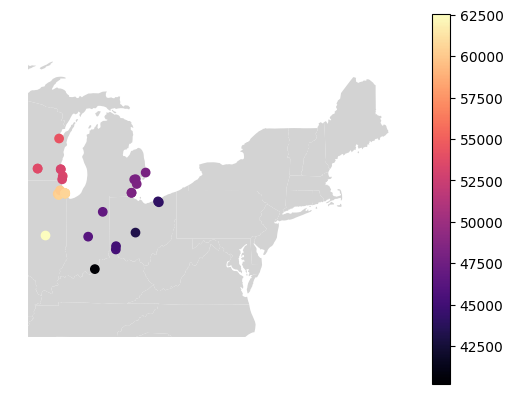

In [19]:
#Q15
location_gdf = gpd.read_file('locations.geojson')
location_map = gpd.read_file("shapes/cb_2018_us_state_20m.shp")

address_list = []
for address in location_gdf["address"]:
    code = re.findall(r"(\d{5})(-\d{4})?$", address)
    if len(code) > 0:
        code = int(code[0][0])
        address_list.append(code)
    else:
        address_list.append(-1)
    
location_gdf["zipcode"] = address_list
location_gdf = location_gdf[location_gdf["zipcode"] >= 40000]
location_gdf = location_gdf[location_gdf["zipcode"] <= 70000]

country_window = box(-90, 35, -55, 50)
master_map = location_map.intersection(country_window)
master_map = master_map[~master_map.is_empty]
master_map.to_crs("EPSG:2022")

ax = master_map.plot(facecolor="lightgray")
dots = location_gdf[location_gdf["geometry"].within(country_window)]
dots = dots.to_crs(master_map.crs)
dots.plot(ax=ax, column="zipcode", legend=True, cmap="magma")
ax.set_axis_off()